<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW_2_i_hope_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
require(readxl)
install.packages('skimr')
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
meta <- read_xlsx("/content/sample_data/metadata.xlsx",sheet = 1)
hdl <- read_tsv("/content/sample_data/high_density_lipids.tsv")
ldl <- read_tsv("/content/sample_data/low_density_lipids.tsv")

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#meta$Sucrose[meta$Sucrose == 0] = 'none'
#meta$Sucrose[meta$Sucrose == 1] = 'smth'

In [3]:
cal_factor <- c('Patient.number','Vial.number')

hdl <- hdl[cal_factor] <- lapply(hdl[cal_factor],factor)

numeric_stats <- skimr::skim(select(meta,where(is.numeric)))
#factor_stats <- skimr::skim(select(meta,where(is.factor)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


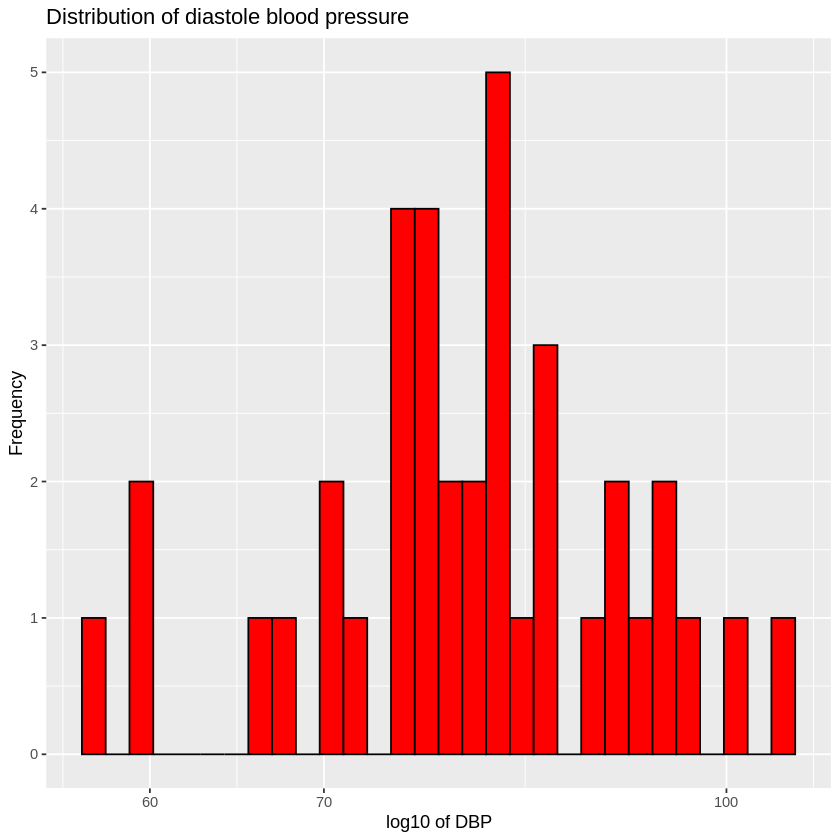

In [4]:
ggplot(meta,aes(Dia)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("Distribution of diastole blood pressure") +
  scale_x_log10(name="log10 of DBP") +
  scale_y_continuous(name = "Frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


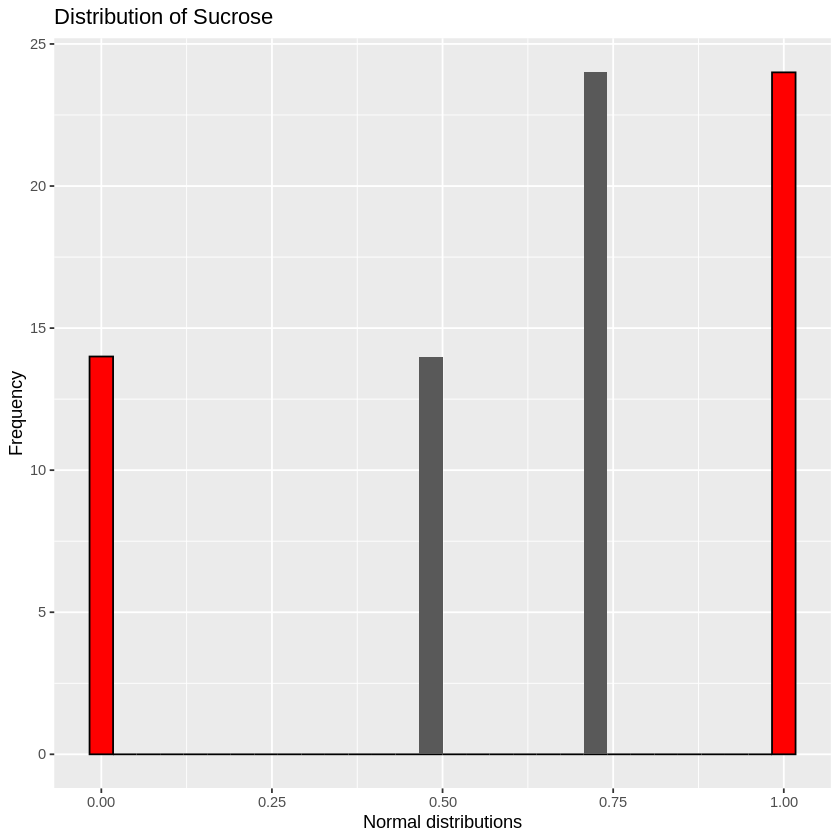

In [5]:
g <- 1/(1+exp(-meta$Sucrose))

ggplot(meta,aes(Sucrose)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("Distribution of Sucrose") +
  stat_bin(aes(g)) +
  scale_x_continuous("Normal distributions") +
  scale_y_continuous("Frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


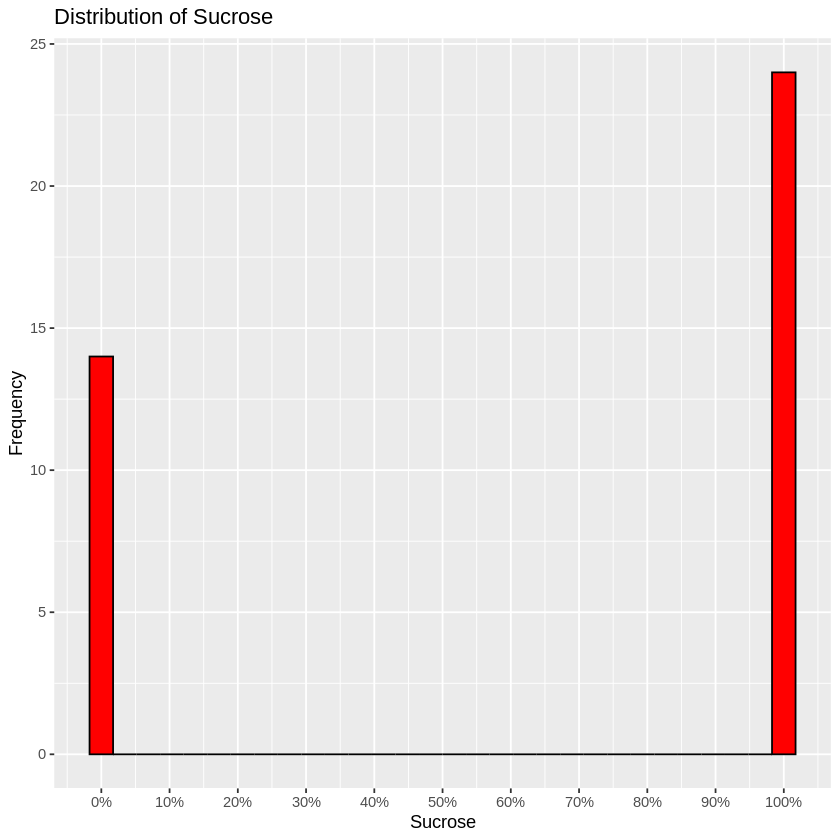

In [6]:
ggplot(meta,aes(Sucrose)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("Distribution of Sucrose") +
  scale_x_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  scale_y_continuous("Frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


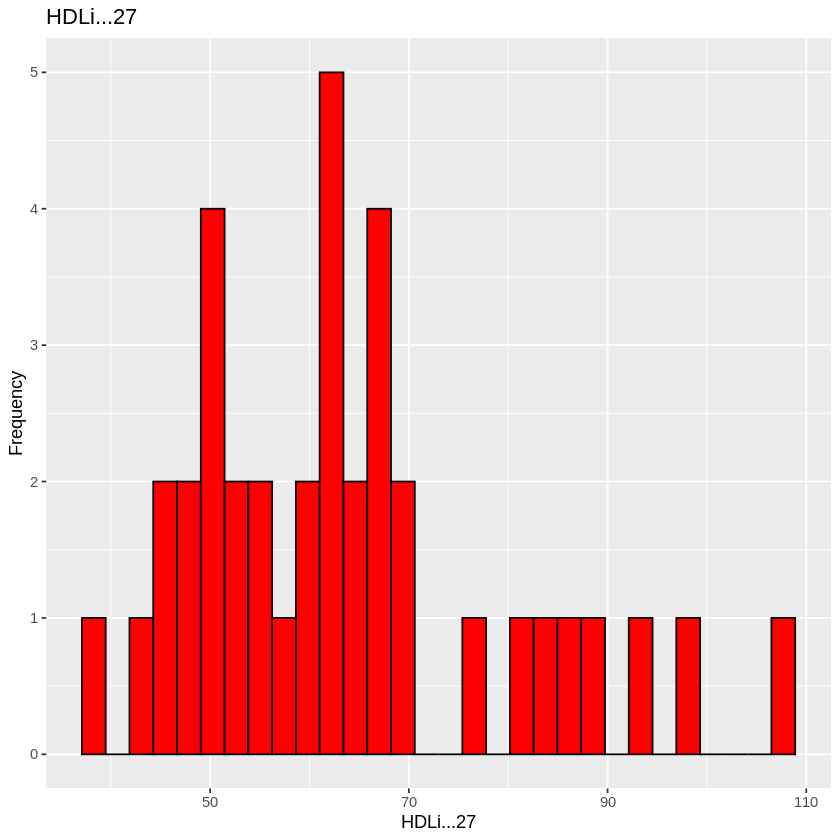

In [7]:
ggplot(meta,aes(HDLi...27)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("HDLi...27") +
  #scale_x_log10(name="log10 of DBP") +
  scale_y_continuous(name = "Frequency") #Poisson distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


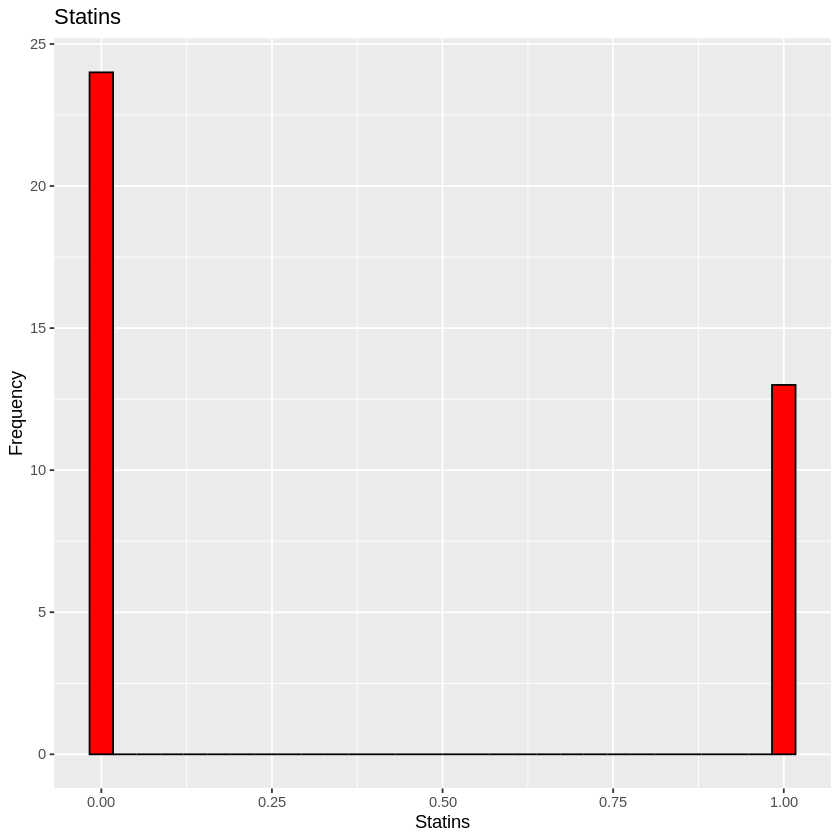

In [8]:
ggplot(meta,aes(Statins)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("Statins") +
  #scale_x_log10(name="log10 of DBP") +
  scale_y_continuous(name = "Frequency") #Bermoulli distribution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


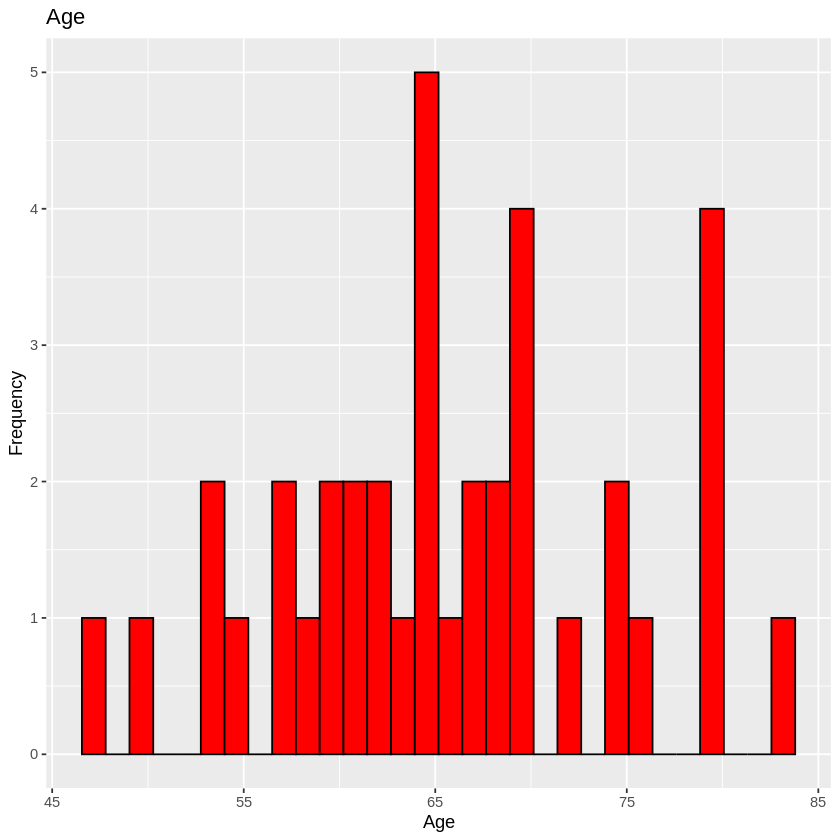

In [9]:
ggplot(meta,aes(Age)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("Age") +
  #scale_x_log10(name="log10 of DBP") +
  scale_y_continuous(name = "Frequency") #Little bit looks like to Gaussian distribution and Binominal

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


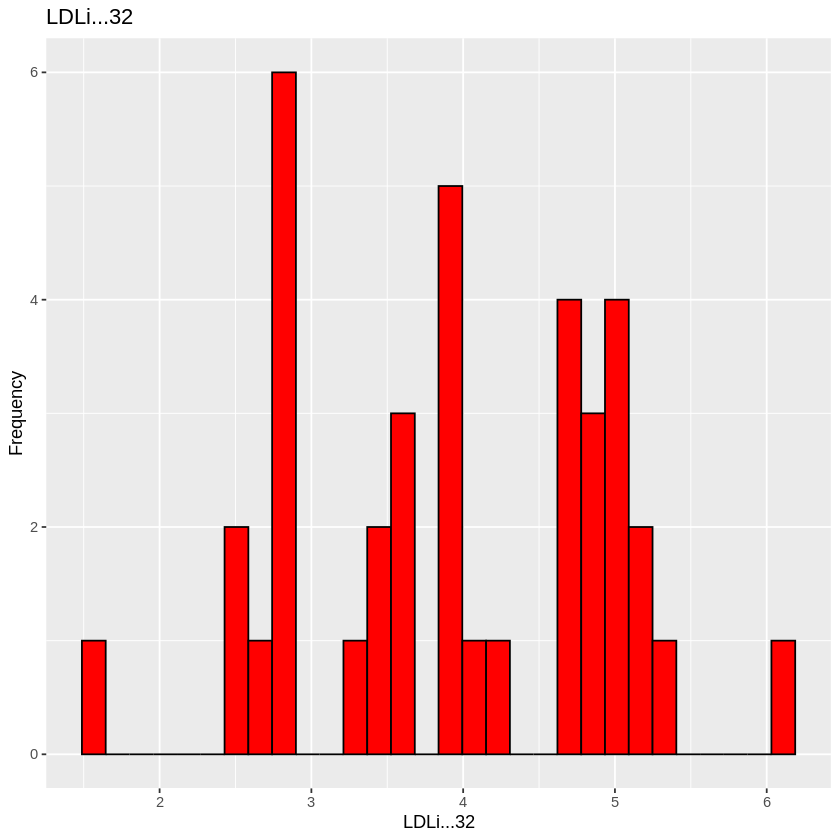

In [10]:
ggplot(meta,aes(LDLi...32)) +
  geom_histogram(color='black',fill='red') +
  ggtitle("LDLi...32") +
  #scale_x_log10(name="log10 of DBP") +
  scale_y_continuous(name = "Frequency") #Poisson distribution

In [ ]:
# Для того чтобы преобразовать переменные в нормальную плотность распределения мы используем: квадратный корень, логарифм , и для Пуассоновского распределения обычно и Применяем логистическое преобразование
#transformed_data <- 1 / (1 + exp(-data))